In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
filePath = '/Users/vaibh/Desktop/heartDisease.csv'

data = pd.read_csv(filePath)

data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print("(Rows, columns): " + str(data.shape))
data.columns
# Prints Number of Rows & Columns. As well as the Column names

(Rows, columns): (303, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
data.nunique(axis=0)
# Returns the number of unique values for each variable.

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
data.describe()
# Summarizes the count, mean, standard deviation, min, and max for numeric variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print(data.isna().sum())
# Prints Missing Values(if any)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<AxesSubplot:>

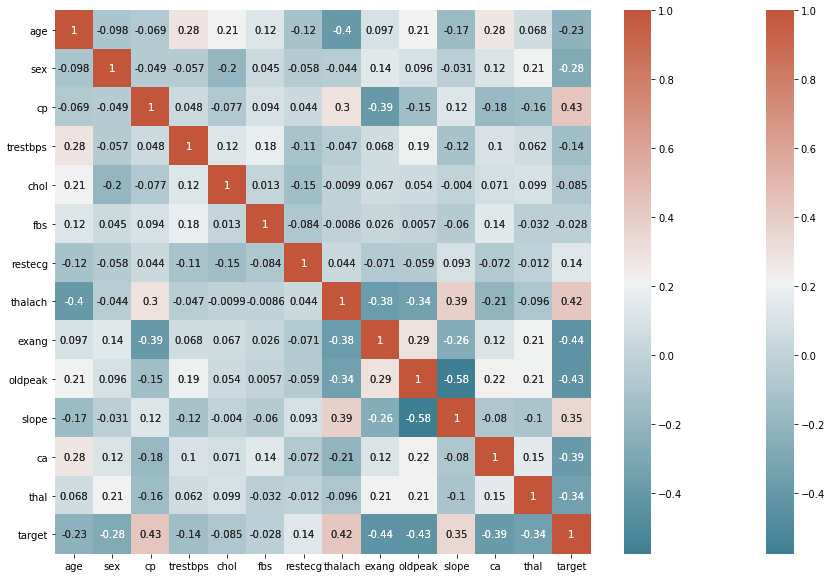

In [7]:
# Exploratory Data Analysis / Data Preprocessing

# Correlations

# Calculate Correlation Matrix - let’s you see correlations between all variables.
# You can see whether something is positively or negatively correlated with predictor(target)

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

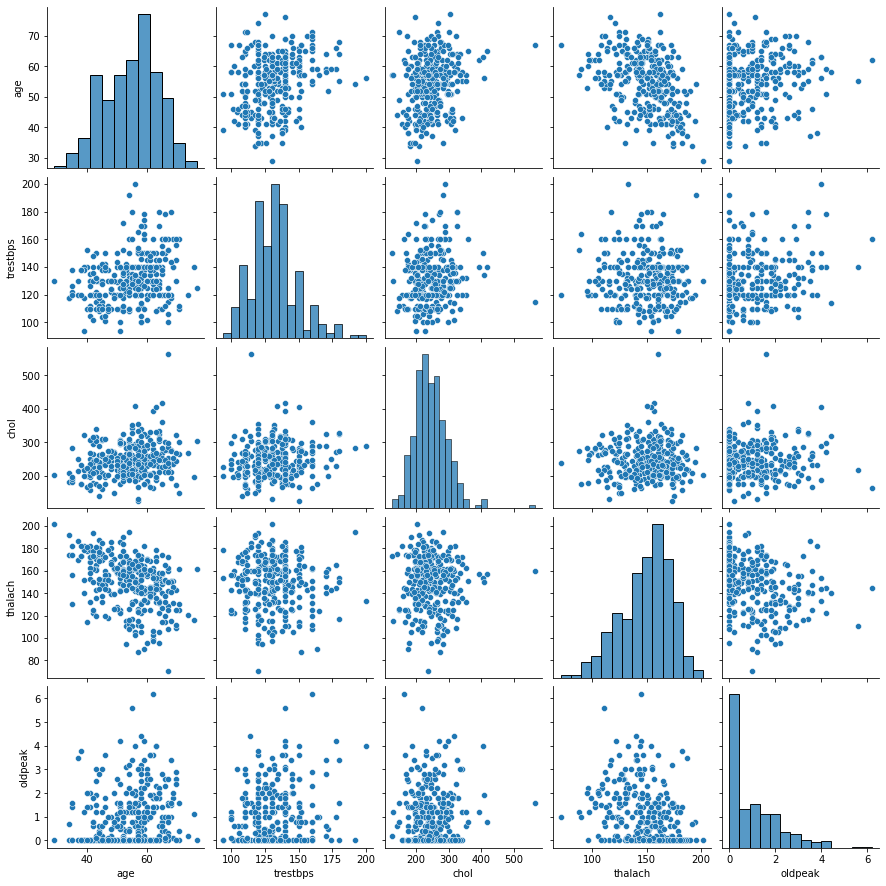

In [8]:
subData = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)
# To make a smaller pairplot with only the continuous variables
# Also a way to see if theirs a positive or negative correlation

Text(10.778541666666662, 0.5, 'ST depression')

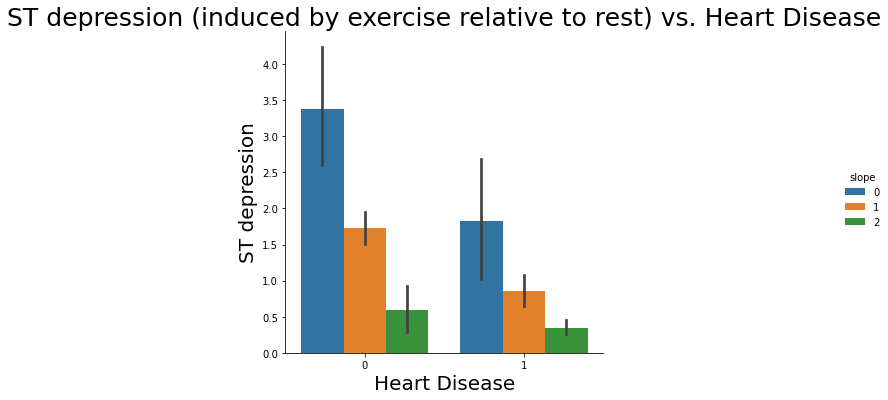

In [9]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

# ST segment depression occurs because when the ventricle is at rest and therefore repolarized. 
# If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. 
# This is supports the plot above because low ST Depression yields people at greater risk for heart disease. 
# While a high ST depression is considered normal & healthy. 
# The “slope” hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). 
                # Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

Text(0, 0.5, 'Thalach Level')

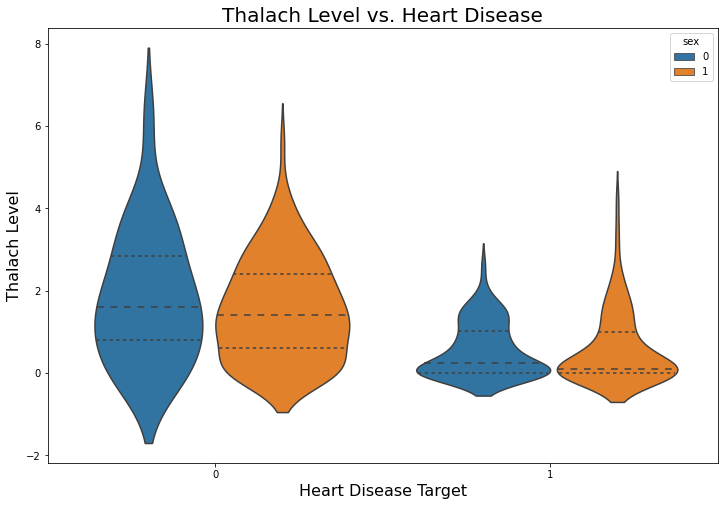

In [10]:
# Violin & Box Plots
# Advantages - is that it shows the basic statistics of the data, as well as its distribution 
# These plots are often used to compare the distribution of a given variable across some categories
# It shows the median, IQR, & Tukey’s fence. (minimum, first quartile (Q1), median, third quartile (Q3), and maximum)
# In addition it can provide us with outliers in our data

plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

# We can see that the overall shape & distribution for negative & positive patients differ vastly. 
# Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, 
#  while negative patients are between 1 & 3. 
# In addition, we don’t see many differences between male & female target outcomes.

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

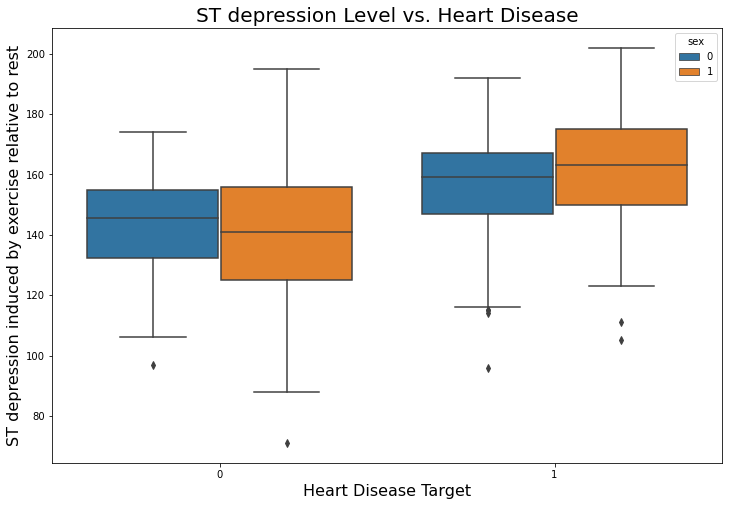

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

# Positive patients exhibit a heightened median for ST depression level, while negative patients have lower levels
# In addition, we don’t see many differences between male & female target outcomes, 
#  except for the fact that males have slightly larger ranges of ST Depression.

In [12]:
# Filtering data by Positive & Negative Heart Disease patient

pos_data = data[data['target']==1]
pos_data.describe()
# Filtering data by POSITIVE Heart Disease patient

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [13]:
neg_data = data[data['target']==0]
neg_data.describe()
# Filtering data by NEGATIVE Heart Disease patient

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [14]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.5830303030303029
(Negative Patients ST depression): 1.5855072463768118


In [15]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))

# From comparing positive and negative patients we can see there are vast differences in means for many of our 13 Features
# From examining the details, 
#    we can observe that positive patients experience heightened maximum heart rate achieved (thalach) average
# In addition, positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak)

(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623


In [16]:
# Machine Learning + Predictive Analytics -Prepare Data for Modeling
# To prepare data for modeling, ASN (Assign,Split, Normalize)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
# Assign the 13 features to X, & the last column to our classification predictor, y

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
# Split the data set into the Training set and Test set

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# Normalize: 
# Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1

In [19]:
# Modeling /Training
# Now we’ll Train various Classification Models on the Training set & see which yields the highest accuracy. 
# We will compare the accuracy of Logistic Regression(LR), Naives Bayes Classifier(GNB) and Decision Trees(DCT)
# NOTE : These are all supervised learning models.

# Model 1 : Logistic Regression

from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

# Precision, Recall, F1-score and Support:
# Precision : be “how many are correctly classified among that class”
# Recall : “how many of this class you find over the whole number of element of this class”
# F1-score : harmonic mean of precision and recall values.
# F1 score reaches its best value at 1 and worst value at 0.
# F1 Score = 2 x ((precision x recall) / (precision + recall))
# Support: # of samples of the true response that lie in that class.

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [20]:
# Model 1 : Logistic Regression ACCURACY = 74%

# Model 2 : Naives Bayes Classifier
    
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [21]:
# Model 2 : Naives Bayes Classifier ACCURACY = 77%

# Model 3: Decision Trees
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [22]:
# Model 3 : Decision Trees ACCURACY = 69%
# From comparing the 3 models, 
# We can conclude that Model 2: Naives Bayes Classifier yields the highest accuracy. With an accuracy of 77%

In [23]:
# Making the Confusion Matrix
# A confusion matrix is a table that is often used to describe the performance of a classification model 
# (or "classifier") on a set of test data for which the true values are known. 
# The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[20 10]
 [ 6 25]]


0.7377049180327869

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[22  8]
 [ 6 25]]


0.7704918032786885

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
accuracy_score(y_test, y_pred3)

[[21  9]
 [10 21]]


0.6885245901639344

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


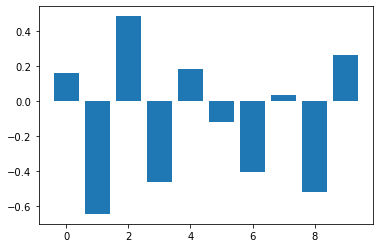

In [26]:
# Feature Importance
# Feature Importance provides a score that indicates how helpful each feature was in our model.
# The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.

# logistic Regression for Feature Importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# Define Dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# Define the Model
model1 = LogisticRegression()
# Fit the Model
model1.fit(X, y)
# Get Importance
importance = model1.coef_[0]
# Summarize Feature Importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# Plot Feature Importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [27]:
# Naive Bayes does not offer an intrinsic method to evaluate feature importance
# There are methods that you can apply post-hoc to analyze the model after it has been trained
# One of these methods is the Permutation Importance
# Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train, y_train)

imps = permutation_importance(gaussian_nb, x_test, y_test)
print(imps.importances_mean)

[ 1.31147541e-02  3.60655738e-02 -6.55737705e-03 -2.29508197e-02
 -1.63934426e-02  0.00000000e+00 -6.55737705e-03  9.83606557e-03
 -2.22044605e-17  3.60655738e-02 -3.27868852e-03  3.60655738e-02
  2.29508197e-02]


Feature: 0, Score: 0.03365
Feature: 1, Score: 0.00362
Feature: 2, Score: 0.18910
Feature: 3, Score: 0.30327
Feature: 4, Score: 0.09218
Feature: 5, Score: 0.00552
Feature: 6, Score: 0.17779
Feature: 7, Score: 0.03113
Feature: 8, Score: 0.12908
Feature: 9, Score: 0.03465


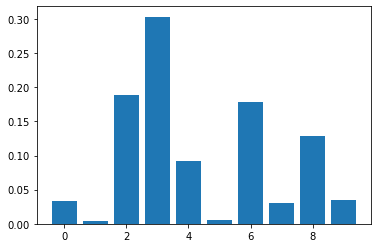

In [28]:
# Decision tree for Feature Importance 
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model3 = DecisionTreeClassifier()
# fit the model
model3.fit(X, y)
# get importance
importance = model3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [29]:
# Conclusions
# 1. Out of the 13 features we examined, 
#  the top 4 significant features that helped us classify between a positive & negative Diagnosis were 
# chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca),
# and ST depression induced by exercise relative to rest (oldpeak).

# 2. Our machine learning algorithm can now classify patients with Heart Disease. 
# Now we can properly diagnose patients, & get them the help they needs to recover.
# By diagnosing detecting these features early, we may prevent worse symptoms from arising later.

# 3. Our Naives Bayes Classifier algorithm yields the highest accuracy, 77%. 
# Any accuracy above 77% is considered good, but be careful because if your accuracy is extremely high,
# it may be too good to be true (an example of Over fitting). Thus, 77% is the ideal accuracy!

In [30]:
# Save the Prediction Model
#    import pickle

# save the classifier
#with open('LogisticRegression.pkl', 'wb') as fid:
#    pickle.dump(LogisticRegression, fid)    

# load it again
#with open('LogisticRegression.pkl', 'rb') as fid:
#    LogisticRegression_loaded = pickle.load(fid)

# save the classifier
#with open('GaussianNB.pkl', 'wb') as fid:
#    pickle.dump(GaussianNB, fid)    

# load it again
#with open('GaussianNB.pkl', 'rb') as fid:
#    GaussianNB_loaded = pickle.load(fid)

# save the classifier
#with open('DecisionTreeClassifier.pkl', 'wb') as fid:
#  pickle.dump(DecisionTreeClassifier, fid)    

# load it again
#with open('DecisionTreeClassifier.pkl', 'rb') as fid:
#   DecisionTreeClassifier_loaded = pickle.load(fid)

In [31]:
def fit_eval_model(model, train_features, y_train, test_features, y_test):    
    results = {}    # Train the model
    model.fit(train_features, y_train)    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)    # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test,    test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)    
    return results

In [32]:
# Initialize the models
#sv = LogisticRegression(random_state = 1)
model1 = LogisticRegression(random_state=1)
#rf = GaussianNB(random_state = 1)
model2 = GaussianNB()
#ab = DecisionTreeClassifier(random_state = 1)
model3 = DecisionTreeClassifier(random_state=1)
# Fit and evaluate models

results = {}
for cls in [model1, model2, model3]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, x_train, y_train, x_test, y_test)

In [33]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
    print()
    print (' — — -')
    print()

LogisticRegression

classification_report :
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

confusion_matrix :
[[20 10]
 [ 6 25]]

 — — -

GaussianNB

classification_report :
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

confusion_matrix :
[[22  8]
 [ 6 25]]

 — — -

DecisionTreeClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1   

In [34]:
# Save the model as serialized object pickle
import pickle
with open('project.pkl', 'wb') as file:
    pickle.dump(model2, file)

In [37]:
print(model2.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


In [38]:
y_pred = model2.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]
